In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df['Genre'].describe()

count        200
unique         2
top       Female
freq         112
Name: Genre, dtype: object

In [11]:
df[df['Genre']=='Female']

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


**Finding Average Income for Male and Females**

In [12]:
df['Annual Income (k$)'].loc[df['Genre']=='Female'].mean()

59.25

In [14]:
print('Mean Annual Income of Female',df['Annual Income (k$)'].loc[df['Genre']=='Female'].mean())
print('Mean Annual Income of Male',round(df['Annual Income (k$)'].loc[df['Genre']=='Male'].mean(),2))

Mean Annual Income of Female 59.25
Mean Annual Income of Male 62.23


**Aggregating For Genders**

In [15]:
df.groupby('Genre').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [16]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
df.iloc[:,[3,4]]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [19]:
X = df.iloc[:,[3,4]].values

In [23]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [24]:
type(X)

numpy.ndarray

[]

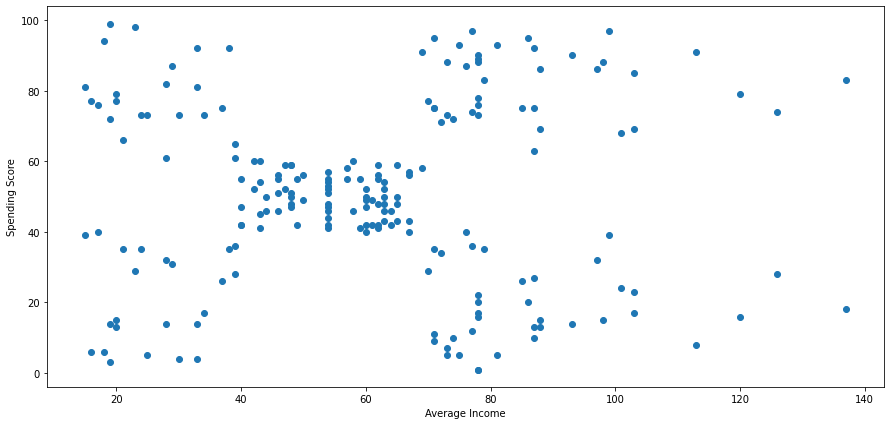

In [32]:
plt.figure(figsize=(15,7))
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Average Income')
plt.ylabel('Spending Score')
plt.plot()

In [33]:
from sklearn.cluster import KMeans

In [34]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[60.05405405 31.54054054]
 [61.19101124 73.47191011]]


In [35]:
print(kmeans.labels_)

[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


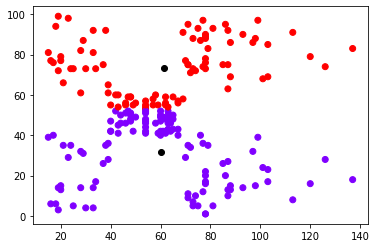

In [36]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show();

In [37]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

print(kmeans.cluster_centers_)

[[110.88888889  80.33333333]
 [ 63.95238095  46.21428571]
 [ 24.58333333   9.58333333]
 [ 25.0952381   80.04761905]
 [109.7         22.        ]
 [ 80.5         90.875     ]
 [ 80.18181818  12.68181818]
 [ 47.86046512  51.97674419]
 [ 77.78571429  73.28571429]
 [ 28.18181818  33.27272727]]


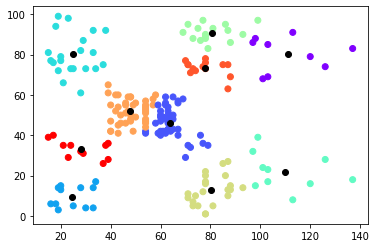

In [38]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.show();

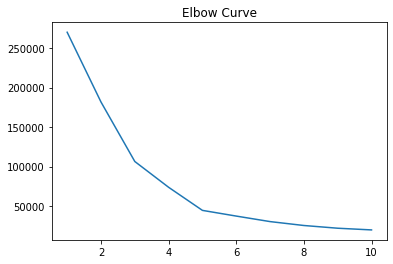

In [39]:
# In above cell if you refer the documentation, all the parameters in KMeans()
# are set to default. So lets remove them
from sklearn.cluster import KMeans
l=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    l.append(kmeans.inertia_)
plt.plot(range(1,11),l)
plt.title('Elbow Curve')
plt.show() 

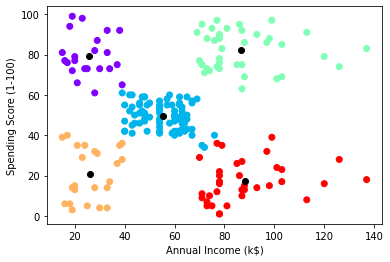

In [40]:
# execute K-means algorithm with 5 clusters and see the output graph
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
# let's plot the points along with the centroid coordinates 
# of each cluster to see how the centroid positions effects clustering.
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], 
            color='black')  
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

In [41]:
print(kmeans.labels_)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [42]:
df['Customer_Segment'] = kmeans.labels_

In [43]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Customer_Segment
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4
